# **Classification of Congressional Voting Records using Random Forest**

# **0.0 Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# **1.0 Data Description**

**1.1 Loading Data**

In [2]:
df=pd.read_csv('house-votes-84.data')

In [3]:
df.head(5)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [4]:
df.tail(5)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
429,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
430,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
431,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
432,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y
433,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,?,n


**1.2 Assigning Column Name**

In [5]:
column_names=['Party','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution',
     'physician-fee-freeze',    'el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',
     'aid-to-nicaraguan-contras',    'mx-missile','immigration','synfuels-corporation-cutback',
     'education-spending','superfund-right-to-sue','crime',
    'duty-free-exports','export-administration-act-south-africa']

In [6]:
df.columns=column_names
df.head(5)

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


**1.3 Data Types and Structure**

In [7]:
df.dtypes

Party                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object

**1.4 Find Missing and Null values**

In [8]:
df.isna().sum()

Party                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [9]:
df.isnull().sum()

Party                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

**1.5 Finding and Visualizing Yays', Nays' and Not-Voted in the dataset**

In [10]:
#finding the number of ayes',nays' and no-votes in the dataset

x=[]
for i in df.columns[1:]:
    x.append(df[i].value_counts())

df_value_counts=pd.DataFrame(x)

df_value_counts

,n,y,?
handicapped-infants,235,187,12
water-project-cost-sharing,192,194,48
adoption-of-the-budget-resolution,170,253,11
physician-fee-freeze,247,176,11
el-salvador-aid,208,211,15
religious-groups-in-schools,152,271,11
anti-satellite-test-ban,181,239,14
aid-to-nicaraguan-contras,177,242,15
mx-missile,205,207,22
immigration,212,215,7


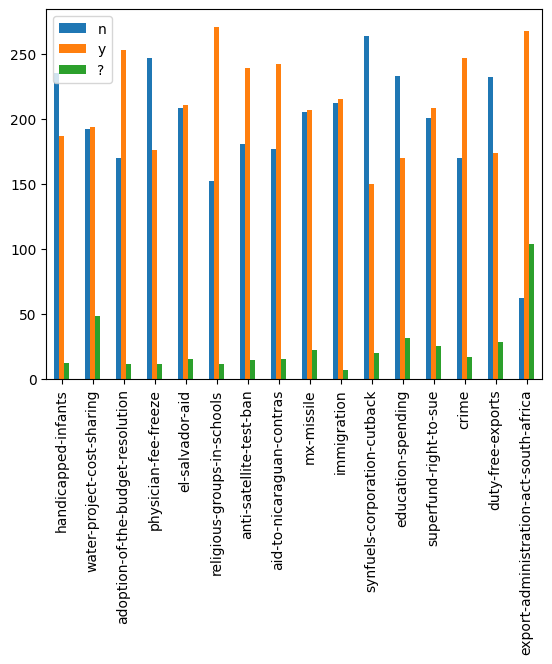

In [11]:
#visualizing the counted values
df_value_counts.plot(kind='bar')
plt.show()

# **2.0 Feature Engineering**

In [12]:
# Replacing Categorical with Numerical Values

df.replace(['y','n','?'],[1,2,0],inplace=True)

In [13]:
# Replacing Republican and Democrat with 1 and 0

df.replace(['republican','democrat'],[1,0],inplace=True)

In [14]:
df.head(5)

,Party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,1,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,0
1,0,0,1,1,0,1,1,2,2,2,2,1,2,1,1,2,2
2,0,2,1,1,2,0,1,2,2,2,2,1,2,1,2,2,1
3,0,1,1,1,2,1,1,2,2,2,2,1,0,1,1,1,1
4,0,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1


# **3.0 Selecting Columns**

**3.1 Extracting Features and Target Variables**

In [15]:
# Selecting feature and target variables

X=df.drop('Party',axis=1) #features
y=df['Party'] # target

**3.2 Dataset with Features and Target variables**

In [16]:
# Features

X.head(5)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,2,1,2,1,1,1,2,2,2,2,2,1,1,1,2,0
1,0,1,1,0,1,1,2,2,2,2,1,2,1,1,2,2
2,2,1,1,2,0,1,2,2,2,2,1,2,1,2,2,1
3,1,1,1,2,1,1,2,2,2,2,1,0,1,1,1,1
4,2,1,1,2,1,1,2,2,2,2,2,2,1,1,1,1


In [17]:
# Target

y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: Party, dtype: int64

**3.3 Splitting Dataset into Test and Train Splits**

In [18]:
# Test-Train Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# **4.0 Classification using Random Forest**

**4.1 Creating multiple Random Forest Classifiers for various Hyperparameters**

In [19]:
# Create a random forest classifier
rand_for = RandomForestClassifier()

# Hyperparameters
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rand_for, param_distributions = param_dist, n_iter=5,cv=5)

# Fit the training data to the classifier
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2375c4d490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2375c26ca0>})

**4.2 Find the best Hyperparameters**

In [20]:
# Best Random Forest Classifier
best_rand_for = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 316}


**4.3 Cross Validate the model**

In [21]:
# Cross Validation

cv_results = cross_validate(best_rand_for, X, y, cv=5)
cv_results

{'fit_time': array([1.58794713, 2.08425069, 3.47855902, 2.93252563, 1.87085867]),
 'score_time': array([0.10049939, 0.19724894, 0.17428446, 0.16634536, 0.1263082 ]),
 'test_score': array([0.96551724, 0.98850575, 0.95402299, 0.97701149, 0.94186047])}

In [22]:
# Mean value of the Cross-Validation Test Scores
cv_results['test_score'].mean()

0.9653835872761294

**4.4 Predict the values using the best fit model**

In [23]:
# Generate predictions with the best model

y_pred = best_rand_for.predict(X_test)

**4.5 Performance Metrics of the Model**

In [24]:
#Print Accuracy, Precision and Recall values

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9540229885057471
Precision: 0.90625
Recall: 0.9666666666666667


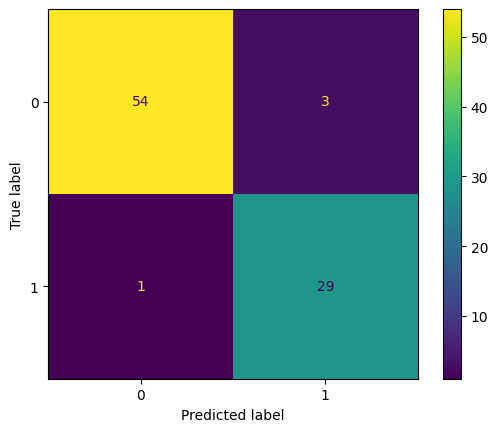

In [25]:
# Create the confusion matrix

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# **5.0 Results**

**5.1 Visualize the Tree**

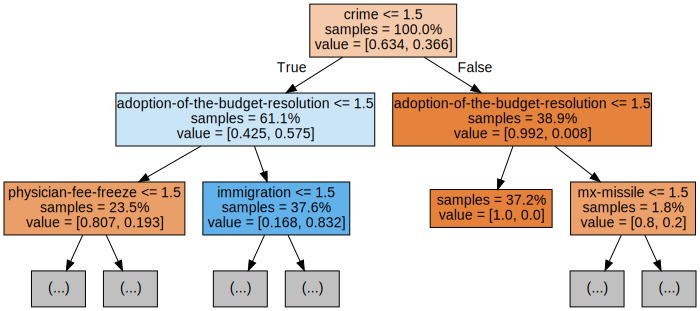

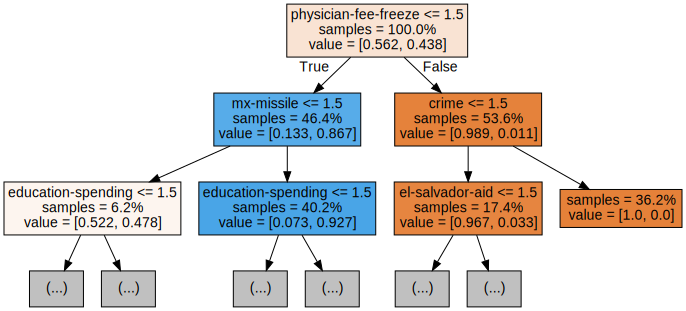

In [26]:
#Visualize 2 layers of the Tree

for i in range(2):
    tree = best_rand_for.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X_train.columns, filled=True,max_depth=2,
                               impurity=False,proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

**5.2 Finding the Importance of Features**

In [27]:
# Create dataframe with the importance of each feature 

Bill_Importance=pd.DataFrame(best_rand_for.feature_importances_,index=X_train.columns,columns=['Importance'])
Bill_Importance

,Importance
handicapped-infants,0.012124
water-project-cost-sharing,0.012489
adoption-of-the-budget-resolution,0.153537
physician-fee-freeze,0.386612
el-salvador-aid,0.078495
religious-groups-in-schools,0.008133
anti-satellite-test-ban,0.018437
aid-to-nicaraguan-contras,0.040973
mx-missile,0.059286
immigration,0.010653


<Axes: >

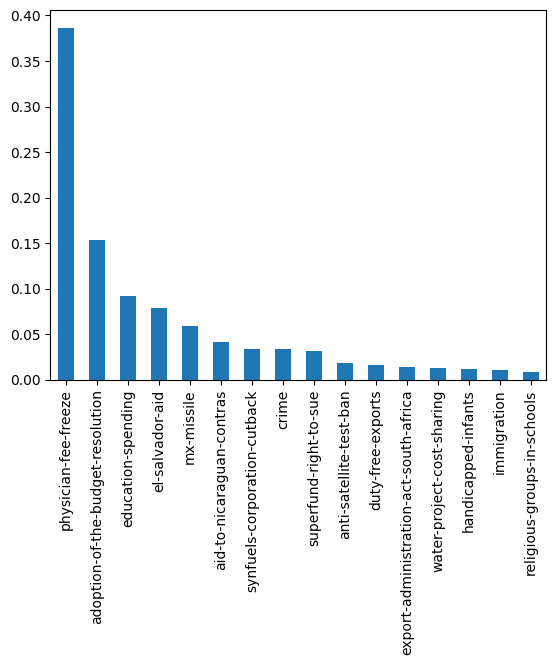

In [28]:
# Visualize w.r.t importance of every bill voted in the congress

Bill_Importance['Importance'].sort_values(ascending=False).plot(kind='bar')